In [68]:
import os
import torch
import torchaudio
import librosas
import numpy as np
import matplotlib.pyplot as plt
from torchaudio.transforms import TimeStretch, AmplitudeToDB, ComplexNorm, MelScale, MFCC
from torchaudio.transforms import Spectrogram, MelSpectrogram
import seaborn as sns

from torch import nn
from torch.distributions import Uniform

In [30]:
folder = "../../dataset/tensor_audio/aldfly/"
wav_folder = "/media/yuigahama/ssd/datasets/birdcall/train_resampled/aldfly/"
filename = folder + "XC189264.tensor"
wav_filename = wav_folder + "XC189264.wav"

In [3]:
n_fft = 2**11
sample_rate = 32_000
wavefrom = torch.load(filename)

In [4]:
time_stretch = TimeStretch(hop_length=None, n_freq=n_fft//2+1)
stft         = Spectrogram(n_fft=n_fft, power=None)
com_norm     = ComplexNorm(power=2.)
mel_specgram = MelSpectrogram(sample_rate, n_fft=n_fft, f_max=8000)
AtoDB        = AmplitudeToDB(top_db=80)

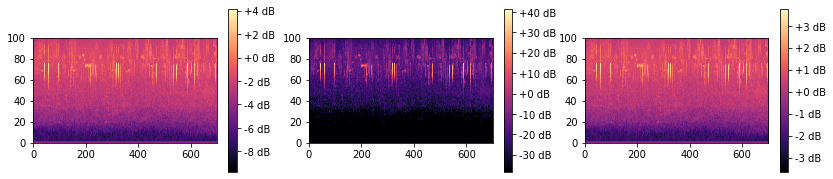

In [61]:
mel = mel_specgram(wavefrom)
mel_DB = AtoDB(mel)
norm_log = (mel.log() - mel.log().mean()) / mel.log().std()

plt.figure(figsize=(14, 3))

plt.subplot(1,3,1)
plt.imshow(mel.log10()[0,:,:].detach().numpy()[::-1], cmap='magma', extent=[0,700,0,100], aspect=4)
plt.colorbar(format='%+2.0f dB')

plt.subplot(1,3,2)
plt.imshow(mel_DB[0,:,:].detach().numpy()[::-1], cmap='magma', extent=[0,700,0,100], aspect=4)
plt.colorbar(format='%+2.0f dB')

plt.subplot(1,3,3)
plt.imshow(norm_log[0,:,:].detach().numpy()[::-1], cmap='magma', extent=[0,700,0,100], aspect=4)
plt.colorbar(format='%+2.0f dB')


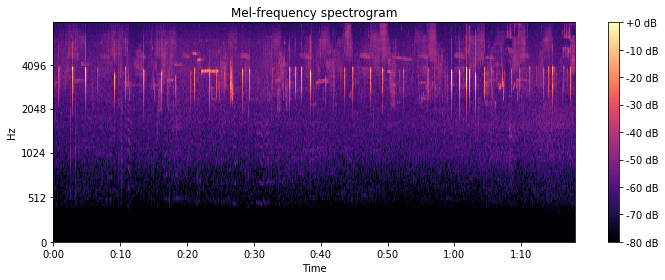

In [31]:
import librosa
import librosa.display
y, sr = librosa.load(wav_filename)
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)
plt.figure(figsize=(10, 4))
S_dB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()

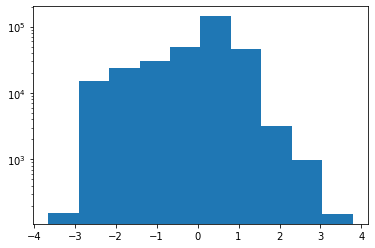

In [63]:
f = mel[0].flatten().log()
f -= f.mean()
f /= f.std()
plt.hist(f, bins=10)
plt.yscale('log')
plt.show()

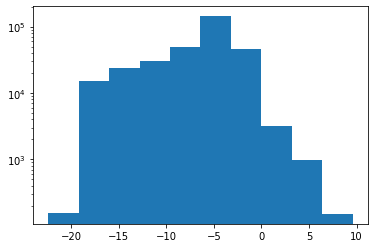

In [59]:
f = mel[0].flatten().log()
plt.hist(f, bins=10)
plt.yscale('log')
plt.show()

In [64]:
stft_ = stft(wavefrom)

In [67]:
com_norm(stft_).size()

torch.Size([1, 1025, 2440])